In [2]:
# Importing Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd                                                                                  # Pandas
import numpy as np                                                                                   # Numpy
import matplotlib.pyplot as plt                                                                      # Matplotlib
import seaborn as sns                                                                                # Seaborn
import plotly.express as px                                                                          # Plotly
from scipy import stats                                                                               # Statistics
from sklearn.model_selection import train_test_split, GridSearchCV                                   # Train_Test Split
from sklearn.preprocessing import PowerTransformer, StandardScaler                                   # Scaling
from sklearn.linear_model import LinearRegression                                                    # Linear Regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor                        # Random forest # Gradient Boosting
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score                        # Stats


1) Importing Data Set

In [4]:
DATA_PATH = "/content/boston.csv"
df0 = pd.read_csv(DATA_PATH)

print("Raw shape:", df.shape)
df0.head(5) # Get first Five Coloumns


Raw shape: (506, 16)


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,504000
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,453600
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,728700
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,701400
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,760200


In [7]:
df0.tail(5) # Get Last Five Coloumns

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,MEDV
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,455700
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,428400
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,382200
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,417900
505,505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9,485100


In [8]:
df0.columns # Get all the Coloumns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price', 'MEDV'],
      dtype='object')

In [9]:
df0.info() # Get all the coloumn Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    int64  
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  Price       506 non-null    float64
 15  MEDV        506 non-null    int64  
dtypes: float64(11), int64(5)
memory usage: 63.4 KB


In [10]:
df0.describe() # Get all the highlevel coloumn Statistics

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,4.557291e+05
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,1.644293e+05
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,1.050000e+05
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,3.528000e+05
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,4.399500e+05
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,5.187000e+05
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.024800e+06


2) Data Cleaning & Schema Normalization

In [5]:
df= df0.copy()

In [6]:
# Normalize column names
df.columns = [c.strip().lower() for c in df.columns]

In [11]:
# Standard column aliases
aliases = {
    'medv':'medv','chas':'chas','crim':'crim','zn':'zn','indus':'indus','nox':'nox',
    'rm':'rm','age':'age','dis':'dis','rad':'rad','tax':'tax','ptratio':'ptratio',
    'lstat':'lstat','b':'b'
}
missing = [a for a in aliases if a not in df.columns]
if missing:
    print("Warning: missing expected columns ->", missing)

In [12]:
# Dtypes
if 'chas' in df.columns:
    df['chas'] = df['chas'].astype('category')  # 0/1 dummy (Charles River)

In [13]:
# Droping  duplicates,  handling missing Values
dup_ct = df.duplicated().sum()
df = df.drop_duplicates().reset_index(drop=True)
na_ct = df.isna().sum().sum()

print(f"Deduped: {dup_ct} rows removed; Missing cells: {na_ct}")
df.info()

Deduped: 0 rows removed; Missing cells: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   unnamed: 0  506 non-null    int64   
 1   crim        506 non-null    float64 
 2   zn          506 non-null    float64 
 3   indus       506 non-null    float64 
 4   chas        506 non-null    category
 5   nox         506 non-null    float64 
 6   rm          506 non-null    float64 
 7   age         506 non-null    float64 
 8   dis         506 non-null    float64 
 9   rad         506 non-null    int64   
 10  tax         506 non-null    int64   
 11  ptratio     506 non-null    float64 
 12  b           506 non-null    float64 
 13  lstat       506 non-null    float64 
 14  price       506 non-null    float64 
 15  medv        506 non-null    int64   
dtypes: category(1), float64(11), int64(4)
memory usage: 60.0 KB


In [14]:
df.head() # Checking Columns

,unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,504000
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,453600
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,728700
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,701400
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,760200


In [15]:
df.tail()

,unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price,medv
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,455700
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,428400
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,382200
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,417900
505,505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9,485100


In [16]:
df.describe() # Checking high level summary stats

,unnamed: 0,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02
mean,252.500000,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,4.557291e+05
std,146.213884,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,1.644293e+05
min,0.000000,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,1.050000e+05
25%,126.250000,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,3.528000e+05
50%,252.500000,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,4.399500e+05
75%,378.750000,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,5.187000e+05
max,505.000000,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.024800e+06


3) Target and Future Santity Checks

In [17]:
# Ensure target present
assert 'medv' in df.columns, "Target column 'medv'found."

# Basic stats
num_cols = [c for c in df.columns if c != 'chas' and pd.api.types.is_numeric_dtype(df[c])]
desc = df[num_cols].describe().T
desc[['mean','std','min','25%','50%','75%','max']]


,mean,std,min,25%,50%,75%,max
unnamed: 0,252.500000,146.213884,0.00000,126.250000,252.50000,378.750000,5.050000e+02
crim,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,8.897620e+01
zn,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,1.000000e+02
indus,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,2.774000e+01
nox,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,8.710000e-01
rm,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.780000e+00
age,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,1.000000e+02
dis,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,1.212650e+01
rad,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,2.400000e+01
tax,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,7.110000e+02


4) Exploratory Data Analysis

# Distribution Identification


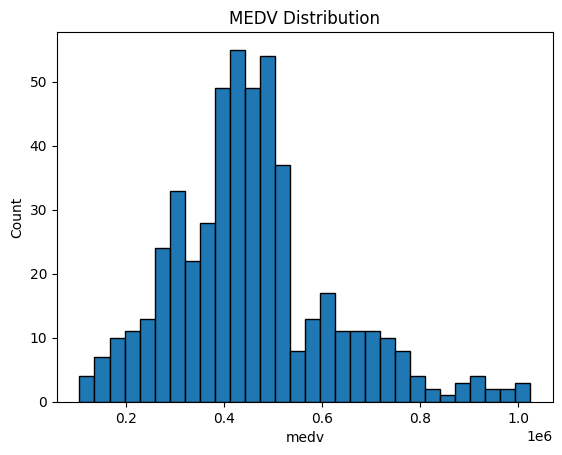

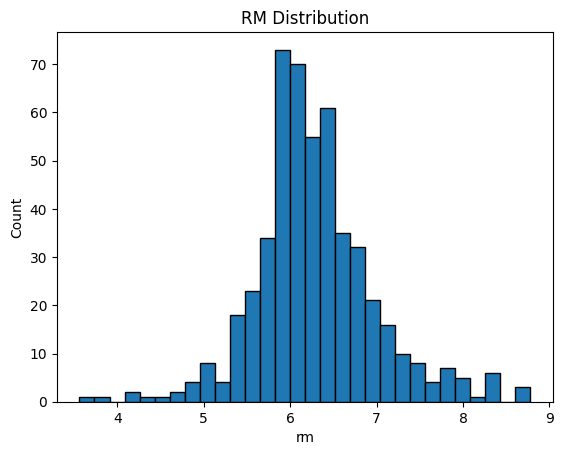

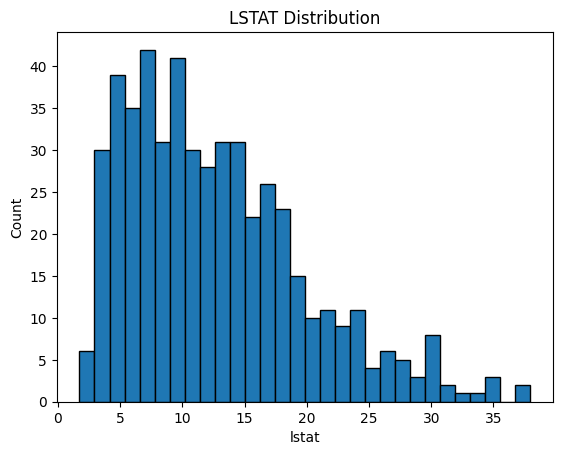

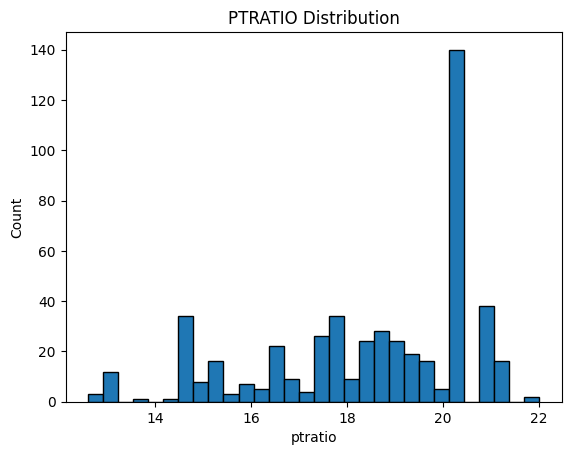

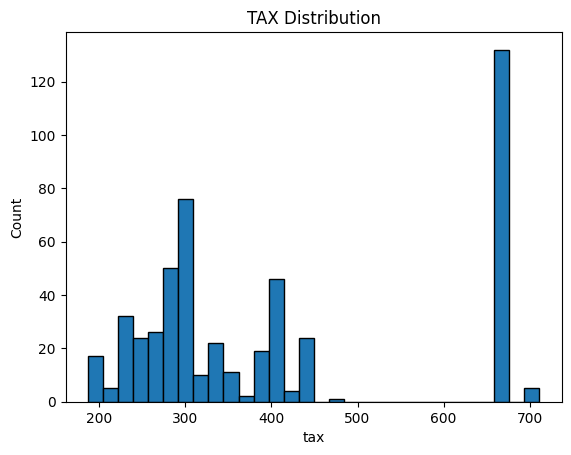

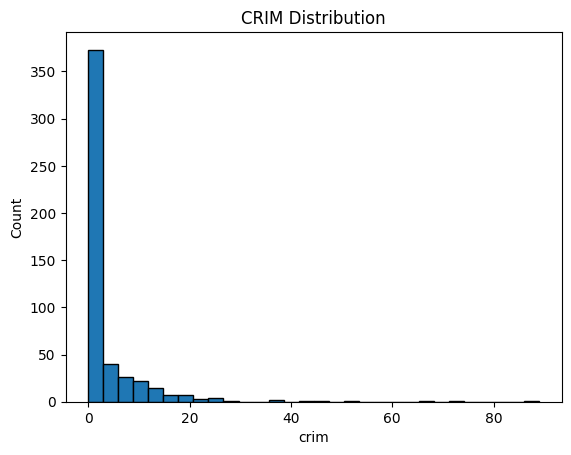

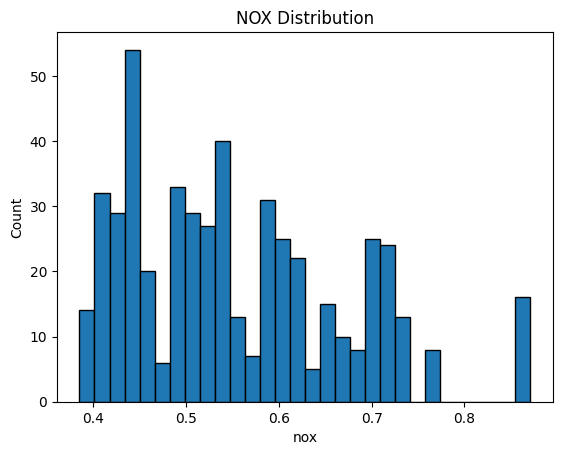

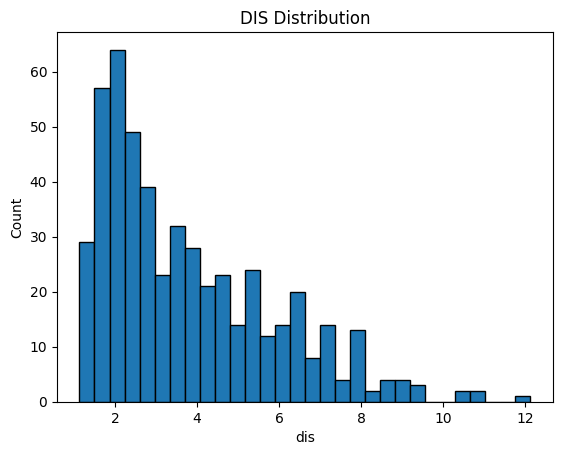

In [18]:
def plot_hist(col, bins=30):
    plt.figure()
    plt.hist(df[col], bins=bins, edgecolor='black')
    plt.title(f'{col.upper()} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

for col in ['medv','rm','lstat','ptratio','tax','crim','nox','dis']:
    if col in df.columns:
        plot_hist(col)


# IQR outlier tagging (numeric)

In [19]:
def iqr_outlier_mask(s, k=1.5):
    q1, q3 = np.percentile(s.dropna(), [25, 75])
    iqr = q3 - q1
    lo, hi = q1 - k*iqr, q3 + k*iqr
    return (s < lo) | (s > hi)

outlier_report = {}
for c in num_cols:
    m = iqr_outlier_mask(df[c])
    outlier_report[c] = int(m.sum())

pd.DataFrame.from_dict(outlier_report, orient='index', columns=['outliers']).sort_values('outliers', ascending=False).head(10)


,outliers
b,77
zn,68
crim,66
price,40
rm,30
medv,22
ptratio,15
lstat,7
dis,5
indus,0


5) Heatmap (Excluding 'B' Column)

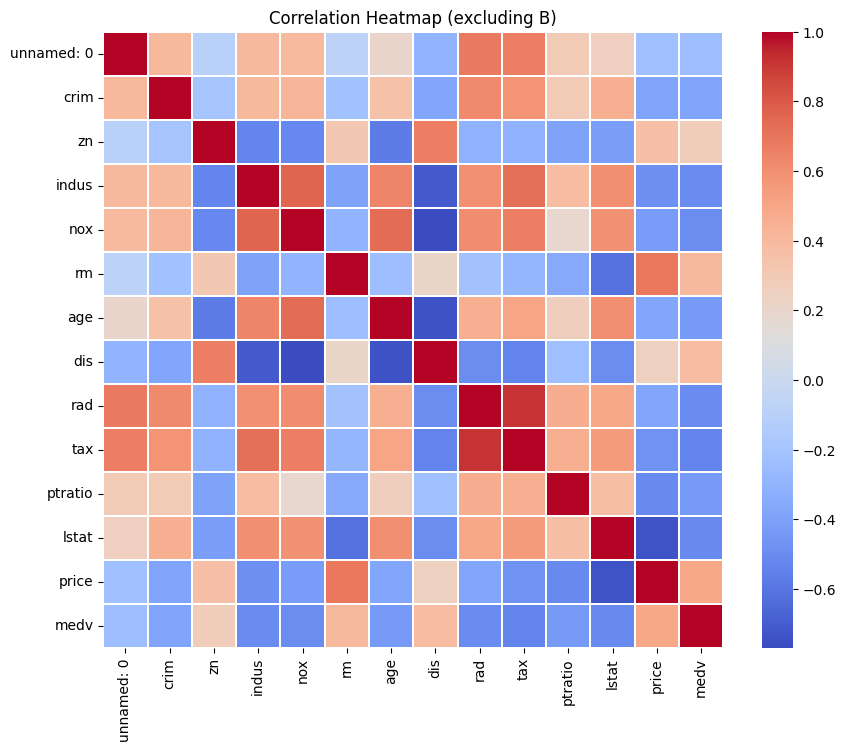

(medv          1.000000
 price         0.489903
 rm            0.403117
 dis           0.386874
 zn            0.268109
 unnamed: 0   -0.243502
 crim         -0.388438
 ptratio      -0.430673
 age          -0.434201
 nox          -0.494565
 Name: medv, dtype: float64,
 tax          -0.537558
 lstat        -0.512110
 rad          -0.506014
 indus        -0.503561
 nox          -0.494565
 age          -0.434201
 ptratio      -0.430673
 crim         -0.388438
 unnamed: 0   -0.243502
 zn            0.268109
 Name: medv, dtype: float64)

In [20]:
heat_cols = [c for c in num_cols if c != 'b']  # exclude sensitive proxy
corr = df[heat_cols].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.3)
plt.title('Correlation Heatmap (excluding B)')
plt.show()

corr['medv'].sort_values(ascending=False).head(10), corr['medv'].sort_values().head(10)


6) Bivariate Relationships (with MEDV)

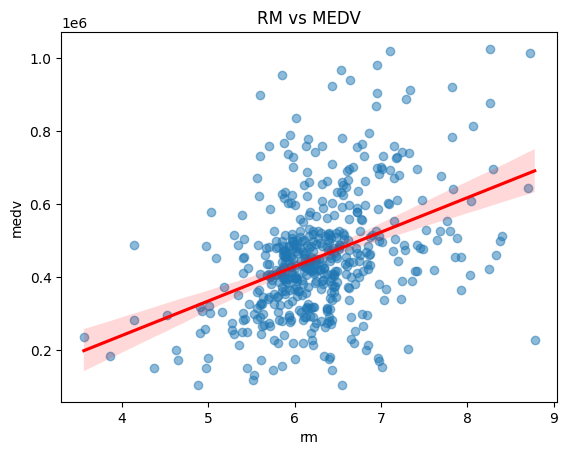

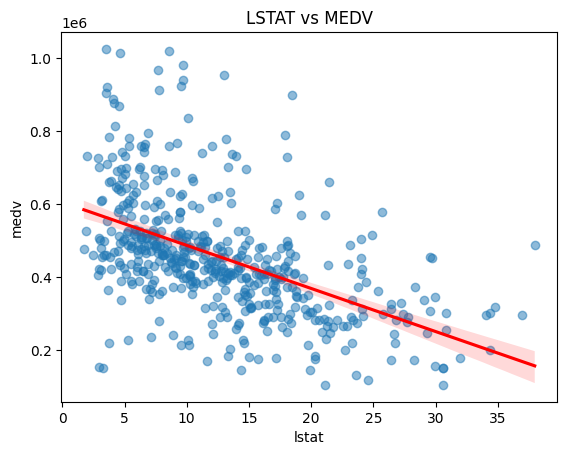

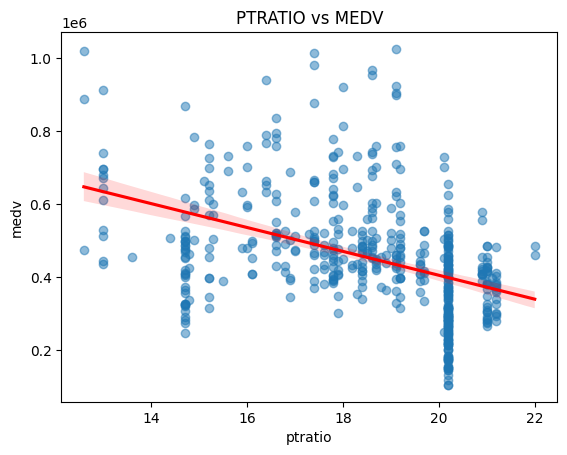

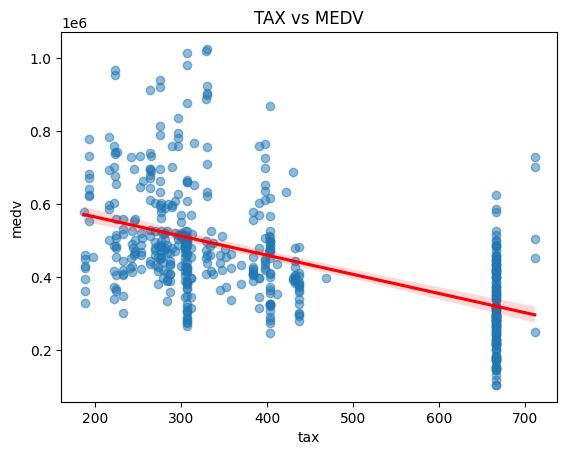

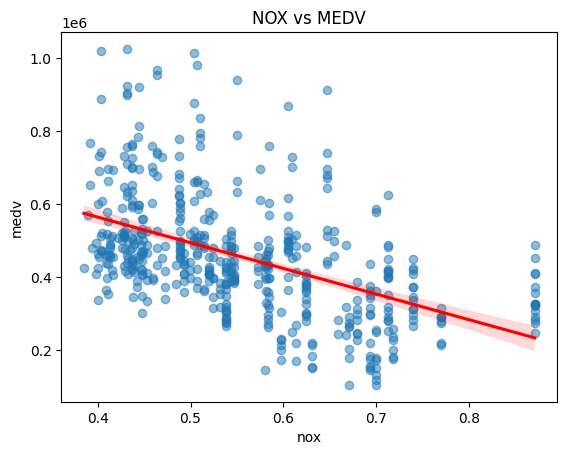

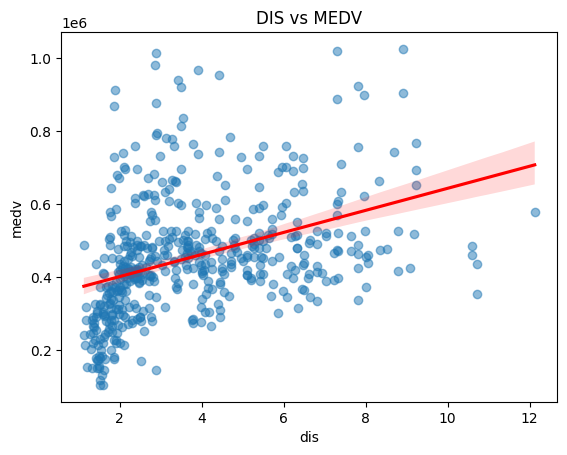

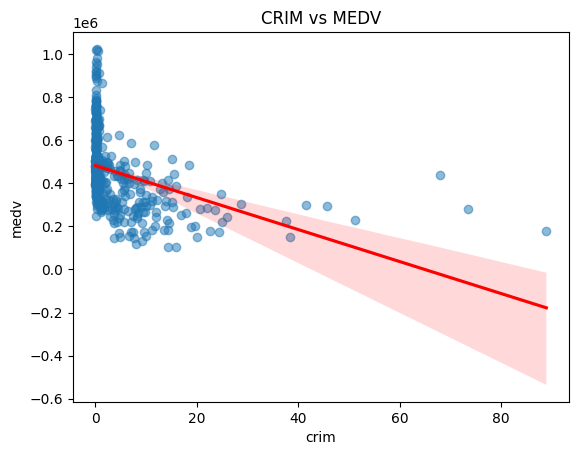

In [21]:
# Scatter + quick trend via seaborn regplot
pairs = ['rm','lstat','ptratio','tax','nox','dis','crim']
for col in pairs:
    if col in df.columns:
        plt.figure()
        sns.regplot(data=df, x=col, y='medv', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
        plt.title(f'{col.upper()} vs MEDV')
        plt.show()


# RM vs MEDV & LSTAT vs MEDV

In [22]:
if {'rm','medv'}.issubset(df.columns):
    fig = px.scatter(df, x='rm', y='medv', trendline='ols', title='RM vs MEDV (interactive)')
    fig.show()

if {'lstat','medv'}.issubset(df.columns):
    fig2 = px.scatter(df, x='lstat', y='medv', trendline='ols', title='LSTAT vs MEDV (interactive)')
    fig2.show()


7) CHAS (River) Comparison & Grouped Insights

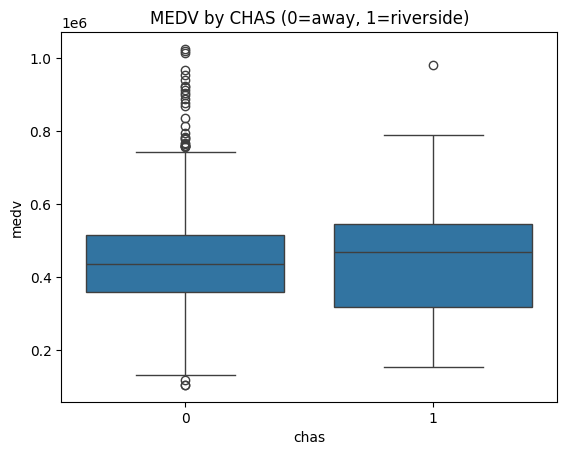

In [23]:
if 'chas' in df.columns:
    plt.figure()
    sns.boxplot(data=df, x='chas', y='medv')
    plt.title('MEDV by CHAS (0=away, 1=riverside)')
    plt.show()

# Grouped KPIs by RAD buckets (access to highways)
if 'rad' in df.columns:
    df['rad_bucket'] = pd.qcut(df['rad'], q=min(4, df['rad'].nunique()), duplicates='drop')
    kpis = df.groupby('rad_bucket').agg(
        n=('medv','count'),
        med_medv=('medv','median'),
        mean_medv=('medv','mean'),
        mean_tax=('tax','mean') if 'tax' in df.columns else ('medv','mean'),
        mean_ptratio=('ptratio','mean') if 'ptratio' in df.columns else ('medv','mean')
    ).reset_index()
    kpis


8) Feature Engineering

In [24]:
# Price bins
df['medv_bin'] = pd.qcut(df['medv'], q=5, labels=['Very Low','Low','Mid','High','Very High'])

# Nonlinear transforms for skewed predictors
for c in ['crim','tax','lstat','nox']:
    if c in df.columns:
        df[f'log_{c}'] = np.log1p(df[c])

# Ratios/derived signals
if {'tax','ptratio'}.issubset(df.columns):
    df['tax_ptratio'] = df['tax']/df['ptratio']
if {'rm','lstat'}.issubset(df.columns):
    df['rm_to_lstat'] = df['rm'] / (df['lstat']+1e-3)


# Cross-Checking how engineered features relate to Target (MEDV)

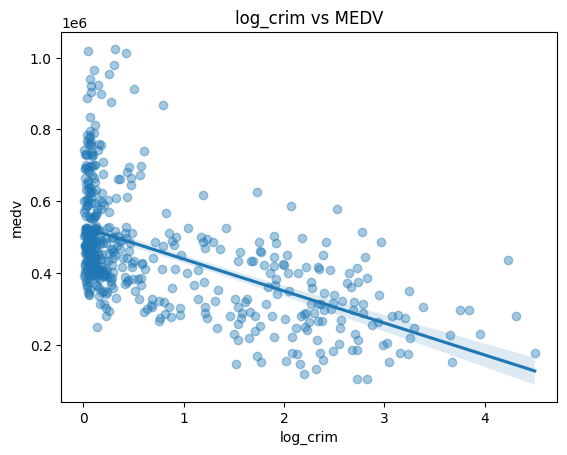

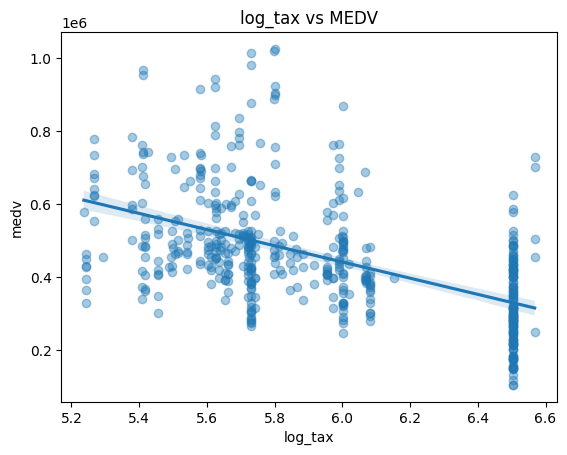

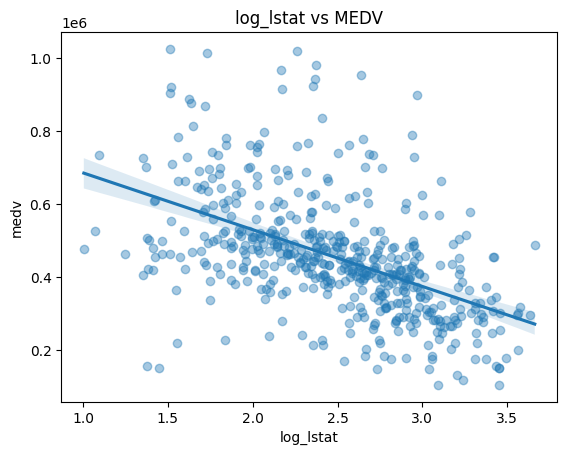

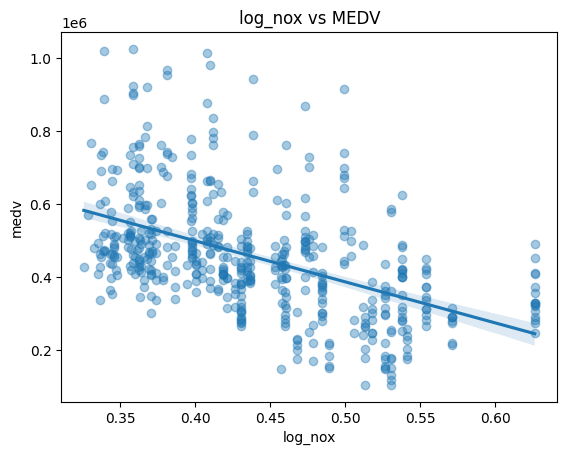

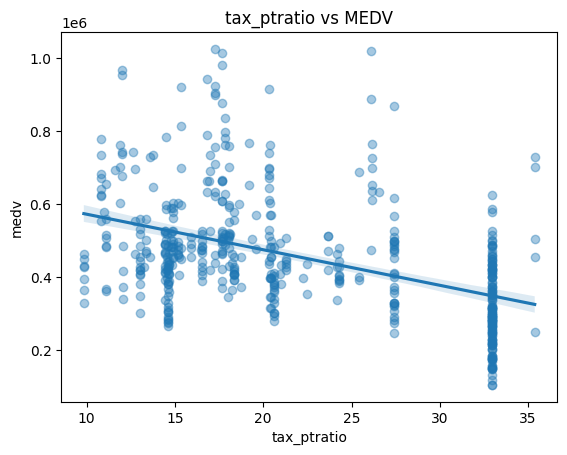

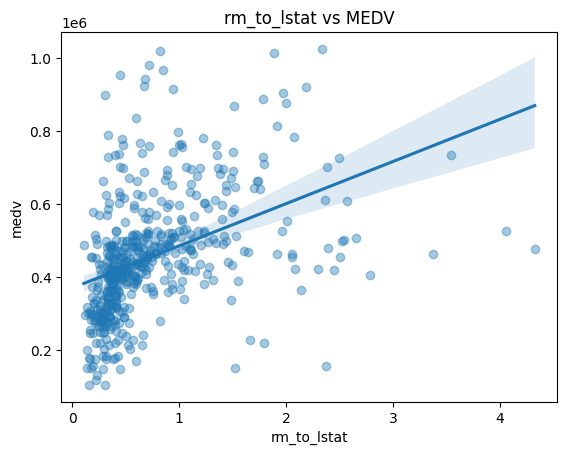

In [25]:
eng_cols = [c for c in df.columns if c.startswith('log_')] + ['tax_ptratio','rm_to_lstat']
eng_cols = [c for c in eng_cols if c in df.columns]
for c in eng_cols:
    plt.figure()
    sns.regplot(data=df, x=c, y='medv', scatter_kws={'alpha':0.4})
    plt.title(f'{c} vs MEDV')
    plt.show()


9) Outlier Treatment

In [26]:
# Winsorize heavy-tailed columns for nicer plots
to_winsor = ['medv','crim','tax','lstat','nox']
df_win = df.copy()
for c in to_winsor:
    if c in df_win.columns:
        df_win[c] = stats.mstats.winsorize(df_win[c], limits=[0.01, 0.01])


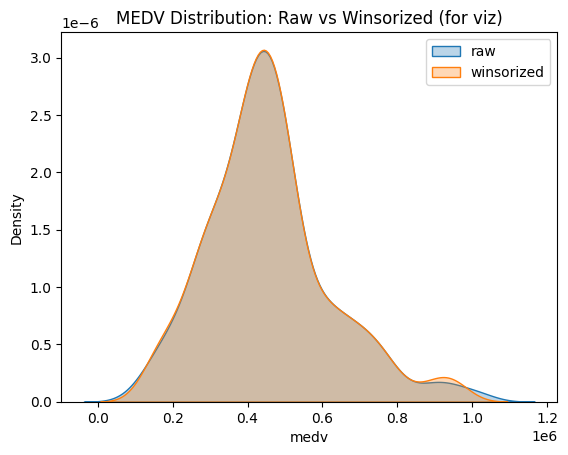

In [27]:
# Compare pre/post distributions quickly for MEDV
plt.figure()
sns.kdeplot(df['medv'], label='raw', fill=True, alpha=0.3)
sns.kdeplot(df_win['medv'], label='winsorized', fill=True, alpha=0.3)
plt.title('MEDV Distribution: Raw vs Winsorized (for viz)')
plt.legend()
plt.show()

10) Comparisions

In [28]:
# Top 5 positive/negative correlations with MEDV (excluding B)
corr_medv = corr['medv'].drop(labels=['medv']).sort_values()
top_neg = corr_medv.head(5)
top_pos = corr_medv.tail(5)

print("Top negative with MEDV:\n", top_neg)
print("\nTop positive with MEDV:\n", top_pos)

Top negative with MEDV:
 tax     -0.537558
lstat   -0.512110
rad     -0.506014
indus   -0.503561
nox     -0.494565
Name: medv, dtype: float64

Top positive with MEDV:
 unnamed: 0   -0.243502
zn            0.268109
dis           0.386874
rm            0.403117
price         0.489903
Name: medv, dtype: float64


In [29]:
#  Compare high vs low price neighborhoods on key drivers
drivers = ['rm','lstat','ptratio','nox','tax']
drivers = [d for d in drivers if d in df.columns]

low = df[df['medv_bin'].isin(['Very Low','Low'])][drivers].mean().rename('LowPriceMean')
high = df[df['medv_bin'].isin(['Very High','High'])][drivers].mean().rename('HighPriceMean')
pd.concat([low, high], axis=1)

,LowPriceMean,HighPriceMean
rm,6.012612,6.550284
lstat,17.036748,8.849005
ptratio,19.400000,17.393532
nox,0.626233,0.498754
tax,507.538835,321.477612


11) Model Preparation

In [35]:
possible_targets = [ "medv", "price", "target"]
target_col = next((c for c in possible_targets if c in df.columns), df.columns[-1])
print("Target:", target_col)

X = df.drop(columns=[target_col]).select_dtypes(include=[np.number]).copy()
y = df[target_col].copy()
print("Feature columns:", X.columns.tolist())

Target: medv
Feature columns: ['unnamed: 0', 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'price', 'log_crim', 'log_tax', 'log_lstat', 'log_nox', 'tax_ptratio', 'rm_to_lstat']


12) Train-Test Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Check the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (404, 20) (404,)
Testing set shape: (102, 20) (102,)


In [42]:
# Pre-Processing Data with Power Transformer & Standard Scaller
def fit_preprocessors(X_tr):
    pt = PowerTransformer(method="yeo-johnson", standardize=False)
    pt.fit(X_tr)                     # fit transformer to training data
    X_tr_pt = pt.transform(X_tr)     # transform training data

    sc = StandardScaler()
    sc.fit(X_tr_pt)                  # fit scaler on transformed training data
    return pt, sc

def transform_with(pt, sc, X):
    """Apply already-fitted PowerTransformer + StandardScaler to X (array/df)."""
    X_t = pt.transform(X)
    X_ts = sc.transform(X_t)
    return X_ts

# Fit preprocessors on training set
pt, sc = fit_preprocessors(X_train)

# Transform train and test explicitly
X_train_pre = transform_with(pt, sc, X_train)
X_test_pre  = transform_with(pt, sc, X_test)

13) Model-1: Linear Regression

In [48]:
lr = LinearRegression()
lr.fit(X_train_pre, y_train)            # train on preprocessed data
pred_lr = lr.predict(X_test_pre)        # predict on preprocessed test set

rmse_lr = mean_squared_error(y_test, pred_lr)**0.5 # Calculate RMSE by taking the square root
mae_lr = mean_absolute_error(y_test, pred_lr) # Calculate Mean Absolute Error
rmae_lr = mae_lr**0.5 # Calculate Root Mean Absolute Error by taking the square root of MAE

r2_lr = r2_score(y_test, pred_lr)
coef = pd.Series(lr.coef_, index=X.columns).sort_values(key=abs, ascending=False) # Coefficient
print("Top linear coefficients:\n", coef.head(8))
print(f"LinearRegression: RMSE={rmse_lr:.3f}, R2={r2_lr:.3f}, RMAE={rmae_lr:.3f}")

Top linear coefficients:
 nox           -1.498070e+06
log_nox        1.465538e+06
tax           -1.281312e+06
log_tax        1.135745e+06
log_lstat      1.055663e+06
lstat         -9.224561e+05
crim          -1.699371e+05
rm_to_lstat    1.419375e+05
dtype: float64
LinearRegression: RMSE=130842.438, R2=0.275, RMAE=313.208


14. Model-2: Random Forest Regression

In [49]:
# Initialize and train the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_pre, y_train)

# Make predictions on the preprocessed test set
pred_rf = rf.predict(X_test_pre)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, pred_rf)**0.5
mae_rf = mean_absolute_error(y_test, pred_rf)
rmae_rf = mae_rf**0.5
r2_rf = r2_score(y_test, pred_rf)

print(f"RandomForestRegressor: RMSE={rmse_rf:.3f}, R2={r2_rf:.3f}, RMAE={rmae_rf:.3f}")

RandomForestRegressor: RMSE=106200.189, R2=0.522, RMAE=263.678


15 Model-3: Gradient Boosting

In [51]:
# Initialize and train the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_pre, y_train)

# Make predictions on the preprocessed test set
pred_gbr = gbr.predict(X_test_pre)

# Evaluate the model
rmse_gbr = mean_squared_error(y_test, pred_gbr)**0.5
mae_gbr = mean_absolute_error(y_test, pred_gbr)
rmae_gbr = mae_gbr**0.5
r2_gbr = r2_score(y_test, pred_gbr)

print(f"GradientBoostingRegressor: RMSE={rmse_gbr:.3f}, R2={r2_gbr:.3f}, RMAE={rmae_gbr:.3f}")

# Feature importances
if hasattr(gbr, "feature_importances_"):
    fi_gbr = pd.Series(gbr.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("GBR top features:\n", fi_gbr.head(8))

GradientBoostingRegressor: RMSE=104509.643, R2=0.537, RMAE=268.490
GBR top features:
 ptratio       0.218934
price         0.206854
unnamed: 0    0.146146
crim          0.076325
dis           0.071824
log_crim      0.059875
log_lstat     0.043982
rm            0.030425
dtype: float64


16) Light Weight Hyperparameter Tuning

In [54]:
# We'll tune RF on the preprocessed training array.
param_grid_rf = {
    "n_estimators": [50, 100],
    "max_depth": [None, 8]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3,
                       scoring="neg_root_mean_squared_error", n_jobs=1)
# Fit grid on preprocessed training set
grid_rf.fit(X_train_pre, y_train)
print("RF Grid best params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_
# Evaluate best RF on preprocessed test set
pred_best_rf = best_rf.predict(X_test_pre)
print("Best RF (grid) RMSE:", mean_squared_error(y_test, pred_best_rf)**0.5)

RF Grid best params: {'max_depth': None, 'n_estimators': 100}
Best RF (grid) RMSE: 106200.18872656875


# 17) Diagnostics: Actual vs Predicted (best model example)

In [57]:
# Choose best by RMSE among our three (plus grid RF)
rmses = {
    "Linear": rmse_lr,
    "RF": rmse_rf,
    "GB": rmse_gbr,
    "RF_grid": mean_squared_error(y_test, pred_best_rf)**0.5
}
best_name = min(rmses, key=rmses.get)
print("RMSE summary:", rmses)
print("Best:", best_name)

RMSE summary: {'Linear': 130842.43823973354, 'RF': 106200.18872656875, 'GB': 104509.64320941309, 'RF_grid': 106200.18872656875}
Best: GB


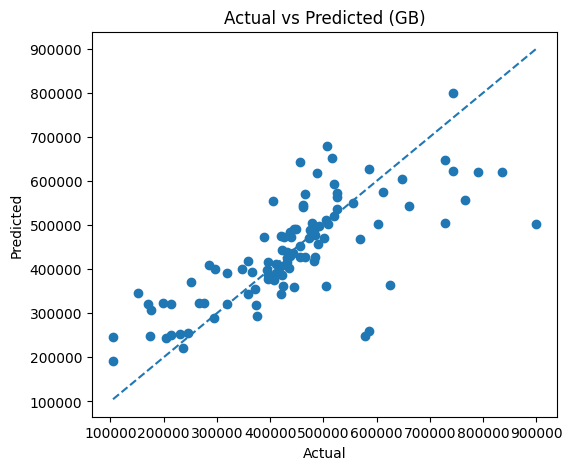

In [59]:
# Pick predictions accordingly
pred_map = {"Linear": pred_lr, "RF": pred_rf, "GB": pred_gbr, "RF_grid": pred_best_rf}
best_preds = pred_map[best_name]

plt.figure(figsize=(6,5))
plt.scatter(y_test, best_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted ({best_name})")
plt.show()

# Thank You